In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

In [3]:
df

,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,yr_built,renovated,yr_renovated,zipcode,city_encoded,lat,long,sqm_living15,sqm_lot15
0,0,790000,3,2.50,241.55,441.29,1.0,False,0,4,9,1951,False,1951,98117,11,47.6833,-122.400,221.11,441.29
1,0,555000,4,2.50,307.51,603.87,2.0,False,0,3,8,2012,False,2012,98065,15,47.5150,-121.870,221.11,464.52
2,0,440000,4,2.25,200.67,754.28,1.0,False,0,3,8,1966,False,1966,98006,21,47.5443,-122.177,171.87,836.13
3,0,295000,2,2.50,151.43,127.09,2.0,False,0,3,7,2009,False,2009,98106,11,47.5489,-122.363,147.72,214.23
4,0,470000,5,2.50,205.32,896.98,1.0,False,0,3,8,1976,False,1976,98011,14,47.7698,-122.222,193.24,802.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,377,183000,3,1.00,108.70,680.05,1.0,False,0,3,7,1962,False,1962,98188,11,47.4685,-122.282,189.52,680.05
19252,377,359000,2,2.75,127.28,105.91,2.0,False,0,3,8,2009,False,2009,98133,11,47.7052,-122.343,127.28,101.26
19253,378,450000,5,2.00,173.73,682.28,1.5,False,0,3,7,1960,False,1960,98007,21,47.5951,-122.144,173.73,710.71
19254,387,445500,2,1.75,129.14,619.66,1.0,False,0,3,6,1941,False,1941,98115,11,47.6914,-122.308,85.47,592.72


In [4]:
X = df.drop(columns=['price'])
y = df['price'].values.reshape(-1,1)
y = np.ravel(y)

LinearRegression

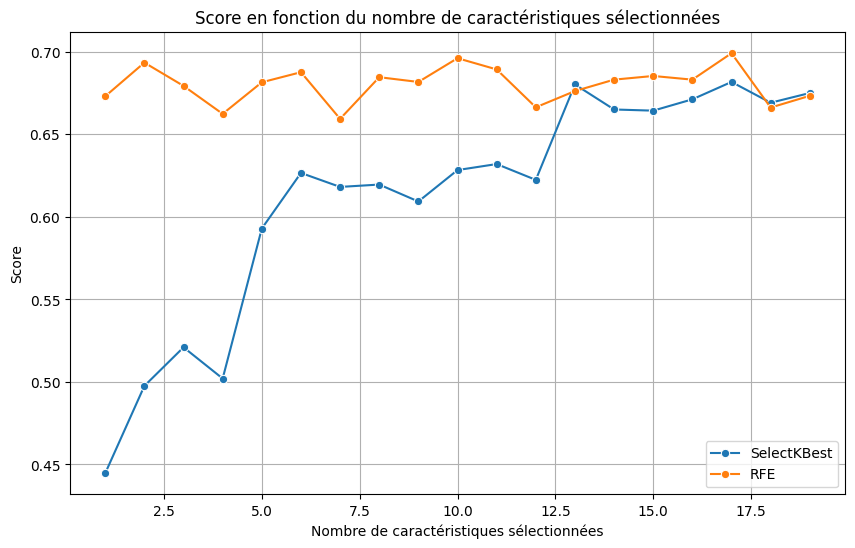

Score maximal avec RFE : 0.6991600128273511 (index : 17)
Score maximal avec SelectKBest : 0.6817590124411398 (index : 17)


In [5]:
# Liste pour stocker les scores
scores = []
scores_RFE = []

# Valeurs de k à tester
k_values = range(1, len(X.columns) + 1)

# Parcours des différentes valeurs de k
for k in k_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

    # Création et entraînement du modèle LinearRegression
    LinearRegression_model = LinearRegression()
    LinearRegression_model.fit(X_train, y_train)

    # Évaluation du modèle
    score = LinearRegression_model.score(X_test, y_test)
    
    # Ajouter le score à la liste
    scores.append(score)
    
    selector_RFE = RFE(ElasticNet(),
                    step=1,
                    n_features_to_select = k)

    selector_RFE.fit(X,y)

     # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Création et entraînement du modèle LinearRegression
    LinearRegression_model_RFE = LinearRegression()
    LinearRegression_model_RFE.fit(X_train, y_train)

    # Évaluation du modèle
    score_RFE = LinearRegression_model_RFE.score(X_test, y_test)
    
    scores_RFE.append(score_RFE)
    

# Création d'un DataFrame pour stocker les scores
results_df = pd.DataFrame({'k_values': k_values, 'scores': scores, 'scores_RFE': scores_RFE})

# Tracé des courbes avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k_values', y='scores', marker='o', label='SelectKBest')
sns.lineplot(data=results_df, x='k_values', y='scores_RFE', marker='o', label='RFE')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score')
plt.title('Score en fonction du nombre de caractéristiques sélectionnées')
plt.grid(True)
plt.legend()
plt.show()

# Affichage des scores maximaux et leurs indices
print(f"Score maximal avec RFE : {results_df['scores_RFE'].max()} (index : {results_df['scores_RFE'].idxmax() + 1})")
print(f"Score maximal avec SelectKBest : {results_df['scores'].max()} (index : {results_df['scores'].idxmax() + 1})")


ElasticNet

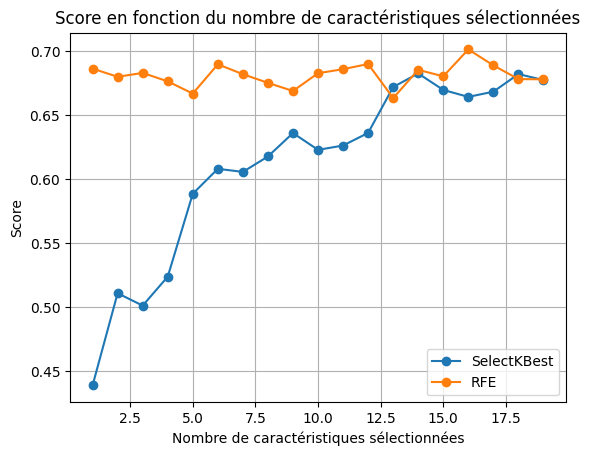

score max _RFE= 0.7012908809093815
index max _RFE= 16
score max = 0.6825022944135632
index max = 14


In [ ]:
# Liste pour stocker les scores
scores = []
scores_RFE = []

# Valeurs de k à tester
k_values = range(1, len(X.columns) + 1)

# Parcours des différentes valeurs de k
for k in k_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

    # Création et entraînement du modèle ElasticNet
    eNet_model = ElasticNet()
    eNet_model.fit(X_train, y_train)

    # Évaluation du modèle
    score = eNet_model.score(X_test, y_test)
    
    # Ajouter le score à la liste
    scores.append(score)
    
    selector_RFE = RFE(ElasticNet(),
                    step=1,
                    n_features_to_select = k)

    selector_RFE.fit(X,y)

     # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Création et entraînement du modèle ElasticNet
    eNet_model_RFE = ElasticNet()
    eNet_model_RFE.fit(X_train, y_train)

    # Évaluation du modèle
    score_RFE = eNet_model_RFE.score(X_test, y_test)
    
    scores_RFE.append(score_RFE)
    

# Création d'un DataFrame pour stocker les scores
results_df = pd.DataFrame({'k_values': k_values, 'scores': scores, 'scores_RFE': scores_RFE})

# Tracé des courbes avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k_values', y='scores', marker='o', label='SelectKBest')
sns.lineplot(data=results_df, x='k_values', y='scores_RFE', marker='o', label='RFE')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score')
plt.title('Score en fonction du nombre de caractéristiques sélectionnées')
plt.grid(True)
plt.legend()
plt.show()

# Affichage des scores maximaux et leurs indices
print(f"Score maximal avec RFE : {results_df['scores_RFE'].max()} (index : {results_df['scores_RFE'].idxmax() + 1})")
print(f"Score maximal avec SelectKBest : {results_df['scores'].max()} (index : {results_df['scores'].idxmax() + 1})")

RandomForestRegressor

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

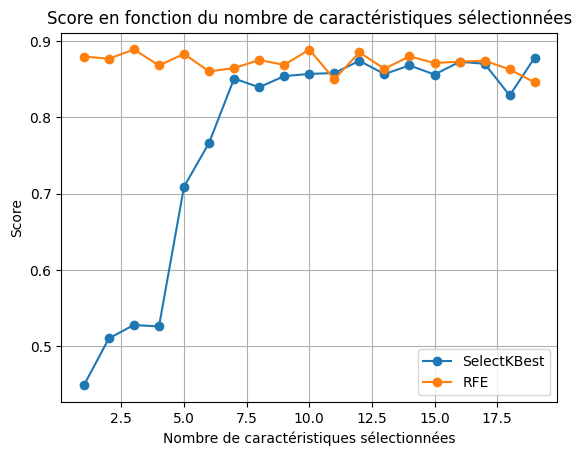

score max _RFE= 0.8889510812432975
index max _RFE= 3
score max = 0.8782348795529
index max = 19


In [ ]:
# Liste pour stocker les scores
scores = []
scores_RFE = []

# Valeurs de k à tester
k_values = range(1, len(X.columns) + 1)

# Parcours des différentes valeurs de k
for k in k_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

    # Création et entraînement du modèle RandomForestRegressor
    RandomForest_model = RandomForestRegressor()
    RandomForest_model.fit(X_train, y_train)

    # Évaluation du modèle
    score = RandomForest_model.score(X_test, y_test)
    
    # Ajouter le score à la liste
    scores.append(score)
    
    selector_RFE = RFE(ElasticNet(),
                    step=1,
                    n_features_to_select = k)

    selector_RFE.fit(X,y)

     # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Création et entraînement du modèle RandomForestRegressor
    RandomForest_model_RFE = RandomForestRegressor()
    RandomForest_model_RFE.fit(X_train, y_train)

    # Évaluation du modèle
    score_RFE = RandomForest_model_RFE.score(X_test, y_test)
    
    scores_RFE.append(score_RFE)
    

# Création d'un DataFrame pour stocker les scores
results_df = pd.DataFrame({'k_values': k_values, 'scores': scores, 'scores_RFE': scores_RFE})

# Tracé des courbes avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k_values', y='scores', marker='o', label='SelectKBest')
sns.lineplot(data=results_df, x='k_values', y='scores_RFE', marker='o', label='RFE')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score')
plt.title('Score en fonction du nombre de caractéristiques sélectionnées')
plt.grid(True)
plt.legend()
plt.show()

# Affichage des scores maximaux et leurs indices
print(f"Score maximal avec RFE : {results_df['scores_RFE'].max()} (index : {results_df['scores_RFE'].idxmax() + 1})")
print(f"Score maximal avec SelectKBest : {results_df['scores'].max()} (index : {results_df['scores'].idxmax() + 1})")

PolynomialFeatures

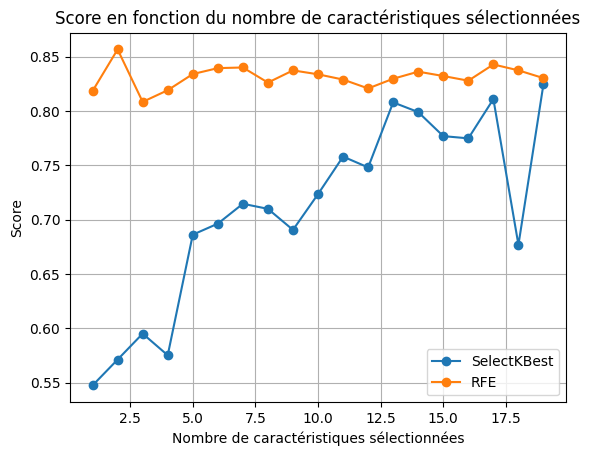

score max _RFE= 0.8567387084402064
index max _RFE= 2
score max = 0.8248818964567892
index max = 19


In [ ]:
# Liste pour stocker les scores
scores = []
scores_RFE = []

# Valeurs de k à tester
k_values = range(1, len(X.columns) + 1)

# Parcours des différentes valeurs de k
for k in k_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

    # Création d'objets pour transformer les caractéristiques en un ensemble polynomial
    poly_features = PolynomialFeatures()
    
    # Transformation des jeux de données d'entraînement et de test en ensembles de données polynomiales
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)

    # Création d'un modèle de régression linéaire
    polynomial_regressor = LinearRegression()

    # Entraînement du modèle sur les données d'entraînement polynomiales
    polynomial_regressor.fit(X_train_poly, y_train)

    # Évaluation du modèle sur les données de test polynomiales
    score = polynomial_regressor.score(X_test_poly, y_test)
    
    scores.append(score)

    selector_RFE = RFE(LinearRegression(),
                    step=1,
                    n_features_to_select = k)

    selector_RFE.fit(X,y)
    
     # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Création d'objets pour transformer les caractéristiques en un ensemble polynomial
    poly_features_RFE = PolynomialFeatures()
    
    # Transformation des jeux de données d'entraînement et de test en ensembles de données polynomiales
    X_train_poly = poly_features_RFE.fit_transform(X_train)
    X_test_poly = poly_features_RFE.fit_transform(X_test)

    # Création d'un modèle de régression linéaire
    polynomial_regressor_RFE = LinearRegression()

    # Entraînement du modèle sur les données d'entraînement polynomiales
    polynomial_regressor_RFE.fit(X_train_poly, y_train)

    # Évaluation du modèle sur les données de test polynomiales
    score_RFE = polynomial_regressor_RFE.score(X_test_poly, y_test)
    
    scores_RFE.append(score_RFE)

# Création d'un DataFrame pour stocker les scores
results_df = pd.DataFrame({'k_values': k_values, 'scores': scores, 'scores_RFE': scores_RFE})

# Tracé des courbes avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k_values', y='scores', marker='o', label='SelectKBest')
sns.lineplot(data=results_df, x='k_values', y='scores_RFE', marker='o', label='RFE')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score')
plt.title('Score en fonction du nombre de caractéristiques sélectionnées')
plt.grid(True)
plt.legend()
plt.show()

# Affichage des scores maximaux et leurs indices
print(f"Score maximal avec RFE : {results_df['scores_RFE'].max()} (index : {results_df['scores_RFE'].idxmax() + 1})")
print(f"Score maximal avec SelectKBest : {results_df['scores'].max()} (index : {results_df['scores'].idxmax() + 1})")

KNN

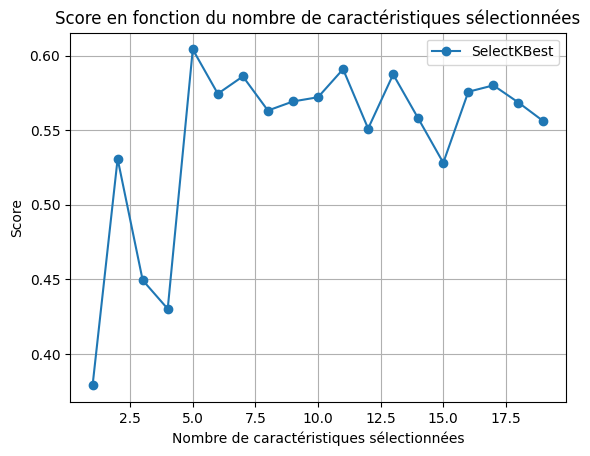

score max = 0.6041685357585529
index max = 5


In [ ]:
# Liste pour stocker les scores
scores = []

# Valeurs de k à tester
k_values = range(1, len(X.columns) + 1)

# Parcours des différentes valeurs de k
for k in k_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    
    # Entraînement du modèle KNeighborsRegressor
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)

    # Évaluation du modèle
    score = knn_model.score(X_test, y_test)
    scores.append(score)
    

# Tracé de la courbe avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=scores, marker='o', label='SelectKBest')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score')
plt.title('Score en fonction du nombre de caractéristiques sélectionnées')
plt.grid(True)
plt.legend()
plt.show()

print(f"Score maximal avec SelectKBest : {max(scores)} (index : {np.argmax(scores) + 1})")


Modele SVR

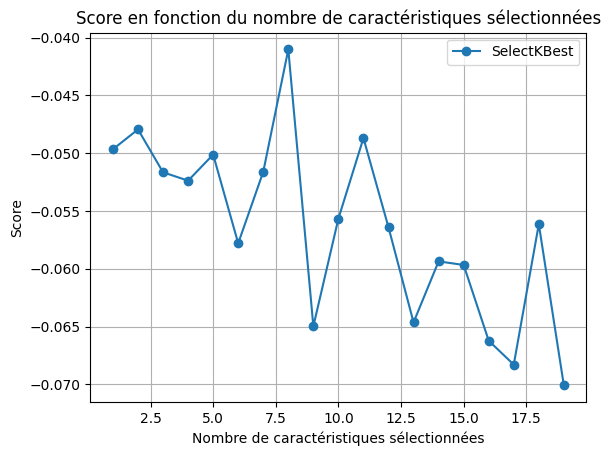

score max = -0.041016651755113376
index max = 8


In [ ]:
# Liste pour stocker les scores
scores = []

# Valeurs de k à tester
k_values = range(1, len(X.columns) + 1)

# Parcours des différentes valeurs de k
for k in k_values:
    # Feature selection
    selector = SelectKBest(f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Séparation du dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    
    # Entraînement du modèle SVR
    model_SVR = SVR()
    model_SVR.fit(X_train, y_train)

    # Évaluation du modèle
    score = model_SVR.score(X_test, y_test)
    scores.append(score)
    

# Tracé de la courbe avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=scores, marker='o', label='SelectKBest')
plt.xlabel('Nombre de caractéristiques sélectionnées')
plt.ylabel('Score')
plt.title('Score en fonction du nombre de caractéristiques sélectionnées')
plt.grid(True)
plt.legend()
plt.show()

print(f"Score maximal avec SelectKBest : {max(scores)} (index : {np.argmax(scores) + 1})")

# Selection des 10 features

LinearRegression

In [7]:
selector_RFE = RFE(LinearRegression(),
                    step=1,
                    n_features_to_select = 10)

selector_RFE.fit(X,y)

# Récupérer les indices des caractéristiques sélectionnées
selected_indices_RFE = selector_RFE.get_support(indices=True)
# Liste des colonnes selectionnées
selected_columns_RFE_linear = X.columns[selected_indices_RFE].tolist()
selected_columns_RFE_linear

['bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'condition',
 'grade',
 'renovated',
 'city_encoded',
 'lat',
 'long']

ElasticNet

In [8]:
selector_RFE = RFE(ElasticNet(),
                    step=1,
                    n_features_to_select = 10)

selector_RFE.fit(X,y)

# Récupérer les indices des caractéristiques sélectionnées
selected_indices_RFE = selector_RFE.get_support(indices=True)
# Liste des colonnes selectionnées
selected_columns_RFE_elastic = X.columns[selected_indices_RFE].tolist()
selected_columns_RFE_elastic

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'city_encoded',
 'lat',
 'long']

RandomForestRegressor

In [9]:
selector_RFE = RFE(RandomForestRegressor(),
                    step=1,
                    n_features_to_select = 10)

selector_RFE.fit(X,y)

# Récupérer les indices des caractéristiques sélectionnées
selected_indices_RFE = selector_RFE.get_support(indices=True)
# Liste des colonnes selectionnées
selected_columns_RFE_random_forest = X.columns[selected_indices_RFE].tolist()
selected_columns_RFE_random_forest

['bathrooms',
 'sqm_living',
 'sqm_lot',
 'waterfront',
 'grade',
 'yr_built',
 'city_encoded',
 'lat',
 'long',
 'sqm_living15']

Autre

In [10]:
# Feature selection
selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Récupérer les indices des caractéristiques sélectionnées
selected_indices = selector.get_support(indices=True)
# Liste des colonnes selectionnées
selected_columns_selectKBest_fregression = X.columns[selected_indices].tolist()
selected_columns_selectKBest_fregression

['bedrooms',
 'bathrooms',
 'sqm_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'city_encoded',
 'lat',
 'sqm_living15']

In [13]:
from collections import Counter

# Concaténer toutes les listes en une seule
all_selected_columns = selected_columns_RFE_linear + selected_columns_RFE_elastic + selected_columns_RFE_random_forest + selected_columns_selectKBest_fregression

# Compter le nombre d'occurrences de chaque valeur
occurrences = Counter(all_selected_columns)

# Trier les valeurs par leur fréquence d'apparition (du plus grand au plus petit)
sorted_occurrences = sorted(occurrences.items(), key=lambda x: x[1], reverse=True)

# Sélectionner les 12 premières valeurs
top_12_values = [value for value, _ in sorted_occurrences[:12]]

print("Les 12 valeurs les plus représentées :", top_12_values)

Les 12 valeurs les plus représentées : ['bathrooms', 'waterfront', 'grade', 'city_encoded', 'lat', 'bedrooms', 'view', 'long', 'condition', 'floors', 'sqm_living', 'sqm_living15']
